**Business Problem:**


*   Walmart has 765 stores across the state of Texas. To cater to their general merchandise requirements, they have established 5 RDC's in Texas.
*   Demand is expected to increase in the coming years and Walmart is considering two new locations at Corpus Christi and Waco.
*   Which RDC's should send goods to which stores?
*   What should be the size of the new facilities to best accomodate the future demand?



**Objective:** 
In this study we look at multiple Walmart - Regional Distribution Centers (RDC's) in Texas and map them to stores within the state such that the transportation cost is reduced.



**Note:**
It is assumed that the volume of goods stored per unit area is the same for a RDC and a store.

[Map Link](https://www.google.com/maps/d/u/0/edit?mid=1ffbGxi_43wFS1QRUWsuOZjMDWqrLEUU&usp=sharing)


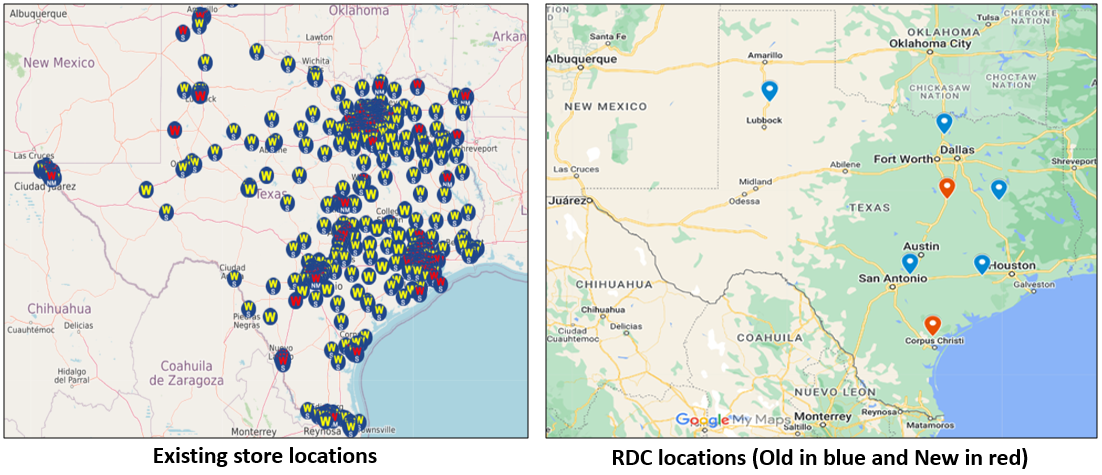

In [ ]:
pip install geopandas

In [ ]:
#installing and importing pyomo
!pip install -q pyomo
from pyomo.environ import *

###installing and importing specific solvers
###glpk
!apt-get install -y -qq glpk-utils

In [ ]:
import pandas as pd

# Reading data into DataFrames

In [ ]:
# loading the excel data
dc1 = pd.read_excel("DC_location.xlsx")
dc2 = pd.read_excel("Dist_between_store_to_DC_in_Texas.xlsx")
dc3 = pd.read_excel("Store_data.xlsx")
dc4 = pd.read_excel("Transportation_cost.xlsx")

# Creating new DataFrame for plotting the Regional Distribution Centers location on Map.

In [ ]:
# Splitting the column in DC_location file containing the co-ordinates data into two new columns 
ndf = dc1.iloc[:,5]
ndf = ndf.str.split(',', expand=True)

# storing the new columns into a new DataFrame
ndf.columns = ['lat', 'long']
pd.to_numeric(ndf['lat'])
pd.to_numeric(ndf['long'])
type(ndf)

pandas.core.frame.DataFrame

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
gdf = gpd.GeoDataFrame(ndf, geometry=gpd.points_from_xy(ndf.long, ndf.lat))

<Axes: >

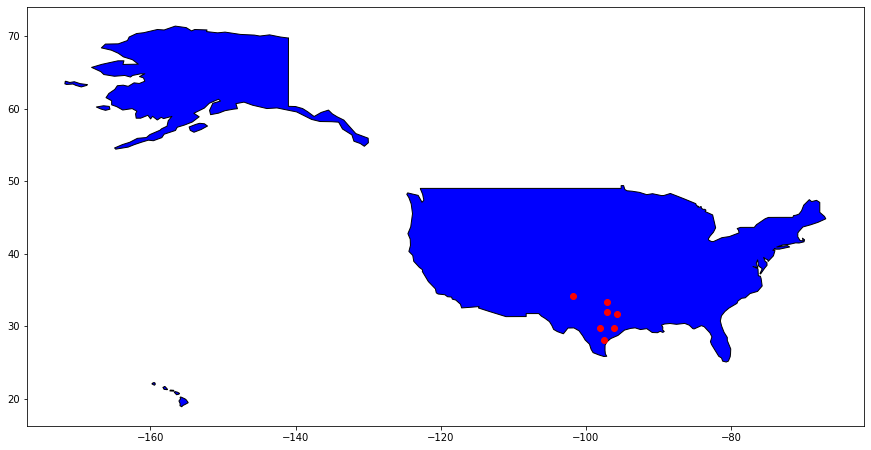

In [ ]:
# Locating the Regional distribution centres on US map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'United States of America'].plot(color='blue', edgecolor='black',figsize=(15,10))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

# Finding the utilization of distribution center capacities.

In [ ]:
# list containing DC id's
dc_id = dc1.iloc[:,0].values.tolist()
dc_id

[6016, 6036, 6012, 6068, 7036, 9901, 9902]

In [ ]:
# list containing capacity of each DC
capacity = dc1.iloc[:,2].values.tolist()
capacity

[1200000, 1200000, 1200000, 1200000, 1200000, 5000000, 5000000]

In [ ]:
# fixed cost of setting up a DC
fixed_cost = dc1.iloc[:,3].values.tolist()
fixed_cost

[50400000, 50400000, 50400000, 50400000, 50400000, 252000000, 252000000]

In [ ]:
# Distance matrix between DC's and stores - calculated in Excel using Bing Maps API with VBA - look at the corresponding Excel file for details.
dc2

,Unnamed: 0,16164,16194,16205,16211,16248,16249,16261,16262,16289,...,28914,28932,28935,28942,28944,28956,28973,28976,28988,29039
0,6016,936.954,168.520,365.019,292.349,151.372,388.961,275.562,419.117,320.368,...,738.565,230.122,384.080,674.625,488.269,241.524,409.444,909.177,392.462,82.307
1,6036,1199.012,277.935,335.036,241.337,523.482,228.719,252.896,224.893,289.951,...,752.124,158.821,237.255,735.236,292.465,208.618,266.264,1171.233,251.823,454.419
2,6012,628.660,833.074,1028.581,934.880,598.273,525.409,888.641,532.721,983.496,...,2.808,633.434,573.329,82.609,523.120,851.900,536.761,622.855,523.618,709.450
3,6068,1053.379,458.266,552.297,458.597,596.352,81.361,470.158,56.381,507.213,...,499.416,226.855,92.677,502.470,79.282,425.880,120.630,1025.599,79.568,527.289
4,7036,1129.335,40.918,166.311,93.641,343.750,421.231,76.854,428.836,121.660,...,870.966,278.270,416.351,807.026,496.407,58.225,441.716,1101.557,424.734,258.050
5,9901,1100.784,241.205,389.658,344.064,315.200,589.539,340.686,619.695,349.169,...,902.395,430.700,584.658,838.453,688.847,334.616,610.023,1073.005,593.042,214.584
6,9902,1081.124,283.332,412.324,287.612,421.416,127.891,289.408,158.047,368.871,...,681.289,51.919,123.011,617.348,227.199,252.664,148.376,1053.346,131.394,352.353


In [ ]:
# Capacity of each store.
dc3

,Store_id,Demand_sqft
0,16164,10374.244625
1,16194,8389.455095
2,16205,12887.102469
3,16211,16269.581554
4,16248,13120.043128
...,...,...
760,28956,9028.152191
761,28973,17414.299926
762,28976,11162.890886
763,28988,10906.981694


In [ ]:
# storing store id's into a list
st_id = dc3.iloc[:,0].values.tolist()
st_id

[16164,
 16194,
 16205,
 16211,
 16248,
 16249,
 16261,
 16262,
 16289,
 16293,
 16304,
 16320,
 16321,
 16322,
 16323,
 16331,
 16338,
 16344,
 16373,
 16395,
 16396,
 16401,
 16405,
 16416,
 16428,
 16434,
 16435,
 16436,
 16461,
 16480,
 16481,
 16483,
 16507,
 16508,
 16512,
 16513,
 16549,
 16559,
 16560,
 16571,
 16591,
 16592,
 16622,
 16658,
 16670,
 16671,
 16691,
 16693,
 16720,
 16739,
 16742,
 16783,
 16805,
 16808,
 16809,
 16847,
 16854,
 16858,
 16861,
 16910,
 16959,
 16960,
 16962,
 16963,
 16977,
 17024,
 17049,
 17059,
 17062,
 17097,
 17114,
 17117,
 17127,
 17158,
 17172,
 17182,
 17192,
 17253,
 17275,
 17395,
 17423,
 17439,
 17623,
 17670,
 17743,
 17891,
 17911,
 17979,
 18023,
 18030,
 18052,
 18074,
 18079,
 18094,
 18105,
 18112,
 18145,
 18180,
 18182,
 18222,
 18242,
 18245,
 18267,
 18355,
 18400,
 18405,
 18430,
 18443,
 18470,
 18488,
 18499,
 18517,
 18522,
 18609,
 18619,
 18621,
 18635,
 18654,
 18675,
 18676,
 18687,
 18695,
 18718,
 18742,
 18751,


In [ ]:
# storing demand for each store into a list
demand = round(dc3.iloc[:,1]).values.tolist()
demand

[10374.0,
 8389.0,
 12887.0,
 16270.0,
 13120.0,
 10883.0,
 13295.0,
 11876.0,
 7375.0,
 18635.0,
 17344.0,
 11455.0,
 14325.0,
 12061.0,
 12862.0,
 14884.0,
 9483.0,
 12796.0,
 12353.0,
 12367.0,
 16009.0,
 21111.0,
 16365.0,
 14156.0,
 15202.0,
 9285.0,
 18348.0,
 12562.0,
 8623.0,
 16015.0,
 13529.0,
 12391.0,
 19635.0,
 7541.0,
 8867.0,
 19035.0,
 9826.0,
 9614.0,
 12269.0,
 18999.0,
 11700.0,
 21374.0,
 7352.0,
 11124.0,
 18024.0,
 9219.0,
 8265.0,
 12561.0,
 16344.0,
 9578.0,
 15477.0,
 12170.0,
 14992.0,
 11316.0,
 11250.0,
 15848.0,
 14907.0,
 10684.0,
 15872.0,
 14526.0,
 11174.0,
 10638.0,
 13769.0,
 21570.0,
 12680.0,
 13196.0,
 10368.0,
 12782.0,
 11802.0,
 13930.0,
 12742.0,
 9278.0,
 10092.0,
 14328.0,
 21485.0,
 13431.0,
 9815.0,
 17314.0,
 11165.0,
 11524.0,
 14628.0,
 20647.0,
 15017.0,
 12380.0,
 12291.0,
 17439.0,
 13626.0,
 13237.0,
 10570.0,
 11183.0,
 18789.0,
 8948.0,
 12481.0,
 10052.0,
 9144.0,
 12151.0,
 15383.0,
 17528.0,
 11707.0,
 14244.0,
 15957.0,
 16373.

In [ ]:
dc4

,Unnamed: 0,16164,16194,16205,16211,16248,16249,16261,16262,16289,...,28914,28932,28935,28942,28944,28956,28973,28976,28988,29039
0,6016,936.95400,173.57560,438.02280,292.34900,172.56408,404.51944,300.36258,461.02870,323.57168,...,819.80715,266.94152,403.28400,769.07250,512.68245,277.75260,413.53844,1036.46178,463.10516,93.00691
1,6036,1294.93296,300.16980,341.73672,255.81722,533.95164,258.45247,283.24352,267.62267,345.04169,...,804.77268,176.29131,279.96090,867.57848,348.03335,235.73834,319.51680,1182.94533,299.66937,463.50738
2,6012,697.81260,916.38140,1080.01005,990.97280,693.99668,572.69581,995.27792,532.72100,1160.52528,...,2.94840,741.11778,670.79493,83.43509,575.43200,928.57100,590.43710,666.45485,539.32654,737.82800
3,6068,1253.52101,485.76196,624.09561,504.45670,608.27904,90.31071,535.98012,62.01910,527.50152,...,559.34592,245.00340,98.23762,557.74170,86.41738,502.53840,144.75600,1158.92687,81.95504,601.10946
4,7036,1298.73525,40.91800,199.57320,96.45023,395.31250,454.92948,89.91918,441.70108,126.52640,...,1027.73988,300.53160,457.98610,831.23678,580.79619,59.38950,463.80180,1266.79055,479.94942,258.05000
5,9901,1166.83104,267.73755,448.10670,388.79232,315.20000,624.91134,371.34774,737.43705,363.13576,...,1064.82610,495.30500,672.35670,880.37565,730.17782,341.30832,713.72691,1105.19515,711.65040,246.77160
6,9902,1113.55772,308.83188,461.80288,310.62096,434.05848,149.63247,338.60736,180.17358,424.20165,...,728.97923,54.51495,147.61320,629.69496,265.82283,288.03696,154.31104,1211.34790,157.67280,352.35300


In [ ]:
# storing distribution cost into a list
dist_cost = round(dc4.iloc[:,1:]).values.tolist()
dist_cost

[[937.0,
  174.0,
  438.0,
  292.0,
  173.0,
  405.0,
  300.0,
  461.0,
  324.0,
  977.0,
  586.0,
  57.0,
  65.0,
  82.0,
  414.0,
  1039.0,
  394.0,
  476.0,
  408.0,
  443.0,
  467.0,
  980.0,
  361.0,
  614.0,
  124.0,
  83.0,
  238.0,
  474.0,
  404.0,
  342.0,
  422.0,
  386.0,
  476.0,
  387.0,
  415.0,
  60.0,
  480.0,
  422.0,
  518.0,
  704.0,
  392.0,
  241.0,
  455.0,
  327.0,
  294.0,
  305.0,
  104.0,
  112.0,
  314.0,
  393.0,
  309.0,
  314.0,
  206.0,
  489.0,
  474.0,
  520.0,
  332.0,
  1051.0,
  590.0,
  447.0,
  447.0,
  444.0,
  417.0,
  424.0,
  464.0,
  441.0,
  431.0,
  335.0,
  382.0,
  453.0,
  967.0,
  477.0,
  303.0,
  439.0,
  1057.0,
  439.0,
  316.0,
  690.0,
  372.0,
  724.0,
  206.0,
  487.0,
  486.0,
  434.0,
  366.0,
  363.0,
  450.0,
  503.0,
  453.0,
  307.0,
  450.0,
  429.0,
  338.0,
  689.0,
  81.0,
  511.0,
  504.0,
  415.0,
  1019.0,
  75.0,
  286.0,
  791.0,
  344.0,
  407.0,
  516.0,
  65.0,
  458.0,
  332.0,
  471.0,
  322.0,
  394.0,
  315

## Using Optimization model in Pyomo to map stores and DC's to get the minimum transportation cost.

In [ ]:
num_dc_loc = len(dc1["DC Number"]) # indexed  by i # storing number of distribution centers
num_st_loc = len(dc3["Store_id"]) # indexed by j # storing number of stores

# creating the model
model = ConcreteModel()

# DV's
model.x = Var(range(num_dc_loc), domain = Binary) # loc DC in city i. model.x[i]
model.y = Var(range(num_dc_loc), range(num_st_loc), domain = NonNegativeIntegers) # assign goods delivered from DC location i to delivery locaiton j. model.y[i,j] 

# Objective: Minimize total cost of distribution of products
tot_dc = sum(model.y[i,j]*dist_cost[i][j] for i in range(num_dc_loc) for j in range(num_st_loc)) # calculating distribution cost between each DC and store
tot_fc = sum( model.x[i]*fixed_cost[i] for i in range(num_dc_loc)) # calculating the fixed cost for each DC
tot_cost = tot_dc + tot_fc # calculating total cost
model.Objective = Objective(expr = tot_cost, sense = minimize) 

# Setting up constraints
model.capacity = ConstraintList()
for i in range(num_dc_loc):
  model.capacity.add(sum(model.y[i,j] for j in range(num_st_loc)) <= model.x[i]*capacity[i]) # sum of all distributions from a DC should be less than or equal to the capacity of the DC 

model.dist_req = ConstraintList()
for j in range(num_st_loc):
  model.dist_req.add(sum(model.y[i,j] for i in range(num_dc_loc)) >= demand[j]) # sum of all deliveries for a  store should be less than or equal to its demand

model.pprint()

Streaming output truncated to the last 5000 lines.
        (1, 375) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 376) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 377) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 378) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 379) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 380) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 381) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 382) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 383) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 384) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 385) :     0 :  None :  None : False :  True : NonNegativeIntegers
        (1, 386) :     0 :  None :  None : False :  True : NonNegativeIntegers
 

In [ ]:
#solve the model
opt = SolverFactory('glpk')
#opt.options['tmlim'] = 5 #specifies the time limit (in seconds)
opt.options['mipgap'] = .00 #specifies the optimality gap tolerance
results = opt.solve(model, tee=True) #can set tee=True if you want to see the details.

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.0 --write /tmp/tmpmadi6vxm.glpk.raw --wglp /tmp/tmpyeit4psl.glpk.glp
 --cpxlp /tmp/tmpacocfv37.pyomo.lp
Reading problem data from '/tmp/tmpacocfv37.pyomo.lp'...
/tmp/tmpacocfv37.pyomo.lp:29126: warning: lower bound of variable 'x1' redefined
/tmp/tmpacocfv37.pyomo.lp:29126: warning: upper bound of variable 'x1' redefined
773 rows, 5363 columns, 10718 non-zeros
5362 integer variables, 7 of which are binary
29133 lines were read
Writing problem data to '/tmp/tmpyeit4psl.glpk.glp'...
28348 lines were written
GLPK Integer Optimizer, v4.65
773 rows, 5363 columns, 10718 non-zeros
5362 integer variables, 7 of which are binary
Preprocessing...
772 rows, 5362 columns, 10717 non-zeros
5362 integer variables, 7 of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+06  ratio =  5.000e+06
GM: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
EQ: min|aij| =  1.000e+00  max|

In [ ]:
# creating a list for storing the choice of DC locations
dcloc = []
for i in range(num_dc_loc):
  dcloc.append(model.x[i]())

print(dcloc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# Cost of this network implementation
print("Cost of the network implementation is (in $): ", model.Objective())

Cost of the network implementation is (in $):  2481237258.0


In [ ]:
# creating a list to hold the distribution matrix mapping DC city to delivery location
dist_matrix = [[model.y[j,i]()for i in range(num_st_loc)] for j in range(num_dc_loc)]

dist_matrix

[[0.0,
  0.0,
  0.0,
  0.0,
  13120.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11455.0,
  14325.0,
  12061.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  9285.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  19035.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  9144.0,
  0.0,
  0.0,
  0.0,
  0.0,
  14244.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12744.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11042.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  17569.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1742

In [ ]:
# Table for distribution matrix
dist_tb = pd.DataFrame(dist_matrix, index = dc_id, columns = st_id )
dist_tb

,16164,16194,16205,16211,16248,16249,16261,16262,16289,16293,...,28914,28932,28935,28942,28944,28956,28973,28976,28988,29039
6016,0.0,0.0,0.0,0.0,13120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13070.0
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6012,10374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18635.0,...,9516.0,0.0,0.0,13492.0,0.0,0.0,0.0,11163.0,0.0,0.0
6068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11876.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14254.0,0.0,0.0,0.0,10907.0,0.0
7036,0.0,8389.0,12887.0,16270.0,0.0,0.0,13295.0,0.0,7375.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9028.0,0.0,0.0,0.0,0.0
9901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9902,0.0,0.0,0.0,0.0,0.0,10883.0,0.0,0.0,0.0,0.0,...,0.0,12802.0,14665.0,0.0,0.0,0.0,17414.0,0.0,0.0,0.0


In [ ]:
# Calculating sum of rows to find the total utilizaiton of a DC
dist_tb['Total_capacity_utilized'] = dist_tb.loc[: ,:].sum(axis = 1)
dist_tb

,16164,16194,16205,16211,16248,16249,16261,16262,16289,16293,...,28932,28935,28942,28944,28956,28973,28976,28988,29039,Total_capacity_utilized
6016,0.0,0.0,0.0,0.0,13120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13070.0,1200000.0
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0
6012,10374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18635.0,...,0.0,0.0,13492.0,0.0,0.0,0.0,11163.0,0.0,0.0,1053415.0
6068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11876.0,0.0,0.0,...,0.0,0.0,0.0,14254.0,0.0,0.0,0.0,10907.0,0.0,1200000.0
7036,0.0,8389.0,12887.0,16270.0,0.0,0.0,13295.0,0.0,7375.0,0.0,...,0.0,0.0,0.0,0.0,9028.0,0.0,0.0,0.0,0.0,1200000.0
9901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1435940.0
9902,0.0,0.0,0.0,0.0,0.0,10883.0,0.0,0.0,0.0,0.0,...,12802.0,14665.0,0.0,0.0,0.0,17414.0,0.0,0.0,0.0,2763949.0


In [ ]:
# calculating percent utilization
dist_tb["Percent_utilization"] = round((dist_tb['Total_capacity_utilized']/capacity)*100)
dist_tb

,16164,16194,16205,16211,16248,16249,16261,16262,16289,16293,...,28935,28942,28944,28956,28973,28976,28988,29039,Total_capacity_utilized,Percent_utilization
6016,0.0,0.0,0.0,0.0,13120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13070.0,1200000.0,100.0
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,100.0
6012,10374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18635.0,...,0.0,13492.0,0.0,0.0,0.0,11163.0,0.0,0.0,1053415.0,88.0
6068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11876.0,0.0,0.0,...,0.0,0.0,14254.0,0.0,0.0,0.0,10907.0,0.0,1200000.0,100.0
7036,0.0,8389.0,12887.0,16270.0,0.0,0.0,13295.0,0.0,7375.0,0.0,...,0.0,0.0,0.0,9028.0,0.0,0.0,0.0,0.0,1200000.0,100.0
9901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1435940.0,29.0
9902,0.0,0.0,0.0,0.0,0.0,10883.0,0.0,0.0,0.0,0.0,...,14665.0,0.0,0.0,0.0,17414.0,0.0,0.0,0.0,2763949.0,55.0


In [ ]:
# Calculating sum of columns
dist_tb.loc["Total_demand", :] = dist_tb.sum()
dist_tb

,16164,16194,16205,16211,16248,16249,16261,16262,16289,16293,...,28935,28942,28944,28956,28973,28976,28988,29039,Total_capacity_utilized,Percent_utilization
6016,0.0,0.0,0.0,0.0,13120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13070.0,1200000.0,100.0
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,100.0
6012,10374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18635.0,...,0.0,13492.0,0.0,0.0,0.0,11163.0,0.0,0.0,1053415.0,88.0
6068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11876.0,0.0,0.0,...,0.0,0.0,14254.0,0.0,0.0,0.0,10907.0,0.0,1200000.0,100.0
7036,0.0,8389.0,12887.0,16270.0,0.0,0.0,13295.0,0.0,7375.0,0.0,...,0.0,0.0,0.0,9028.0,0.0,0.0,0.0,0.0,1200000.0,100.0
9901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1435940.0,29.0
9902,0.0,0.0,0.0,0.0,0.0,10883.0,0.0,0.0,0.0,0.0,...,14665.0,0.0,0.0,0.0,17414.0,0.0,0.0,0.0,2763949.0,55.0
Total_demand,10374.0,8389.0,12887.0,16270.0,13120.0,10883.0,13295.0,11876.0,7375.0,18635.0,...,14665.0,13492.0,14254.0,9028.0,17414.0,11163.0,10907.0,13070.0,10053304.0,572.0


# Result:

*   The two new RDC's at Chorpus Christi (9901) and Waco (9902) have 29% and 55% utilization of their capacity.
*   The existing RDC at Plain View (6012) is being under utilized at 88%.
*   The need for additional RDC's is clearly evident as the other existing RDC's are at 100% capacity.